In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from custom_transforms.transforms import *
from statsmodels.tsa.stattools import adfuller
from scripts.load_data import load_weather_df, load_price_df
from datetime import timedelta

In [2]:
#Load and merge data


price_weather_weekly_df = pd.read_csv('../processed_data/price_weather_weekly_df.V1.csv', index_col=0)
cor = price_weather_weekly_df.corr(method="spearman")
price_weather_weekly_df

,Alface Americana - Roça,Alface Crespa - Roça,Alface Lisa - Roça,Alface Americana - Atacado,Alface Crespa - Atacado,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_mean","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_sum","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_mean","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)_max",...,Alface Crespa - Roça_-3,Alface Crespa - Roça_-4,Alface Crespa - Roça_-5,Alface Crespa - Roça_-6,Alface Crespa - Roça_-7,Alface Crespa - Roça_-8,Alface Crespa - Roça_-9,Alface Crespa - Roça_-10,Alface Crespa - Roça_-11,Alface Crespa - Roça_-12
dt,,,,,,,,,,,,,,,,,,,,,
2017-04-30 00:00:00+00:00,0.849167,0.513889,0.550000,NaN,NaN,0.391667,12.0,65.8,909.321429,914.3,...,0.474583,0.426667,0.428750,0.456806,0.513472,0.534306,0.489861,0.447639,0.402778,0.408750
2017-05-07 00:00:00+00:00,0.781667,0.541667,0.513889,NaN,NaN,0.070238,8.4,11.8,909.821429,914.1,...,0.426667,0.428750,0.456806,0.513472,0.534306,0.489861,0.447639,0.402778,0.408750,0.417500
2017-05-14 00:00:00+00:00,0.725000,0.467778,0.444444,NaN,NaN,0.108333,4.6,18.2,907.244048,911.5,...,0.428750,0.456806,0.513472,0.534306,0.489861,0.447639,0.402778,0.408750,0.417500,0.411944
2017-05-21 00:00:00+00:00,0.698333,0.375000,0.437778,NaN,NaN,0.302381,7.2,50.8,907.041071,910.4,...,0.456806,0.513472,0.534306,0.489861,0.447639,0.402778,0.408750,0.417500,0.411944,0.389722
2017-05-28 00:00:00+00:00,0.666667,0.322222,0.322222,NaN,NaN,0.153571,7.4,25.8,910.460714,912.7,...,0.513472,0.534306,0.489861,0.447639,0.402778,0.408750,0.417500,0.411944,0.389722,0.360556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-03 00:00:00+00:00,1.875000,0.750000,0.750000,1.0,0.5,0.077381,5.2,13.0,905.600595,910.5,...,0.638021,0.606771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 00:00:00+00:00,1.458333,0.677083,0.677083,1.0,0.5,0.697619,28.2,117.2,906.600000,910.2,...,0.606771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-17 00:00:00+00:00,1.125000,0.562500,0.562500,1.0,0.5,0.347619,28.2,58.4,906.604464,910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import functools

interest_cols = ['Alface Crespa - Roça', 'Alface Crespa - Roça_-1', 'Alface Crespa - Roça_-2',
                'Alface Crespa - Roça_-3', 'Alface Crespa - Roça_-4', 'Alface Crespa - Roça_-5',
                'Alface Crespa - Roça_-6', 'Alface Crespa - Roça_-7', 'Alface Crespa - Roça_-8',
                'Alface Crespa - Roça_-9', 'Alface Crespa - Roça_-10', 'Alface Crespa - Roça_-11',
                 'Alface Crespa - Roça_-12']
reduced_cor = cor[interest_cols]
transposed_cor = reduced_cor.transpose()

#sum values of all columns
sum = transposed_cor.mean(axis=0)
sum

sum_df = pd.DataFrame()
stats_dict = {'columns': transposed_cor.columns.tolist(), 'mean': [], 'max': []}

for col in transposed_cor.columns:
    stats_dict['mean'].append(transposed_cor[col].apply(abs).mean())
    stats_dict['max'].append(transposed_cor[col].apply(abs).max())
    

pd.DataFrame(stats_dict)

,columns,mean,max
0,Alface Americana - Roça,0.505961,0.864842
1,Alface Crespa - Roça,0.566963,1.000000
2,Alface Lisa - Roça,0.565495,0.974520
3,Alface Americana - Atacado,NaN,NaN
4,Alface Crespa - Atacado,NaN,NaN
...,...,...,...
287,Alface Crespa - Roça_-8,0.717502,1.000000
288,Alface Crespa - Roça_-9,0.678005,1.000000
289,Alface Crespa - Roça_-10,0.625428,1.000000
290,Alface Crespa - Roça_-11,0.562660,1.000000



### Highest correlations of each group

"Alface Americana - Roça",0.535699,0.864656
"Alface Lisa - Roça",0.581249,0.970696
"TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)_max",0.342270,0.443879
"PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)_max",0.344404,0.433358
"Alface Crespa - Roça_+50",0.329447,0.415891
"Alface Crespa - Roça_+49",0.342411,0.415891
"Alface Crespa - Roça_+51",0.312076,0.411033
"RADIACAO GLOBAL (Kj/m²)_max",0.217891,0.397538
"Alface Crespa - Roça_+52",0.293853,0.394981
"Alface Crespa - Roça_+53",0.275425,0.371779
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)_max",0.239047,0.317160
"VENTO, VELOCIDADE HORARIA (m/s)_max",0.228239,0.299120
"UMIDADE RELATIVA DO AR, HORARIA (%)_max",0.193499,0.248678
"VENTO, DIREÇÃO HORARIA (gr) (° (gr))_max",0.179559,0.192340

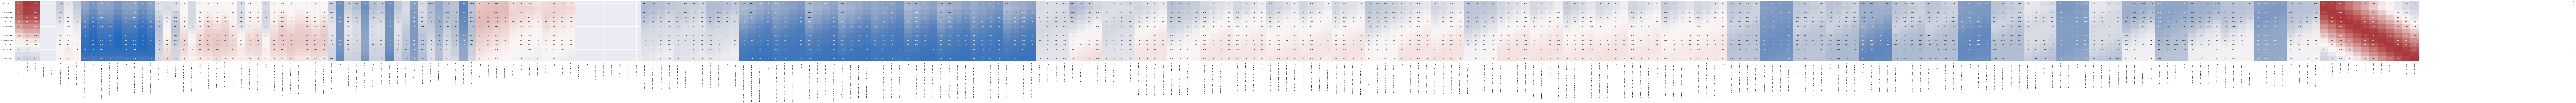

In [4]:
plt.figure(figsize=(500, 10))
sns.heatmap(cor[interest_cols].transpose(),  cmap=sns.color_palette("vlag", as_cmap=True), annot=True)
#plt.show()
plt.savefig('correlation3.png', bbox_inches = 'tight')